In [2]:
import math as mt
import numpy as np
from matplotlib import pyplot as py
%matplotlib inline

In [3]:
# function for creating flow grid
def flowgrid (xstart, xend, ystart, yend, N):
    x = np.linspace(xstart,xend,N)
    y = np.linspace(ystart,yend,N)
    X,Y = np.meshgrid(x,y)
    return X,Y

In [4]:
# Defining grid of flow
N = 200
xstart, xend, ystart, yend = -4.0,4.0,-2.0,2.0
X,Y = flowgrid(xstart,xend,ystart,yend,N)

In [5]:
# Free Stream
u_inf = 1.0
psi_free = u_inf * Y
u_free = u_inf * np.ones((N,N),dtype=float)
v_free = np.zeros((N,N),dtype=float)

In [6]:
#functions for velocity and stream function with source or sink
def get_vel(strength, xs, ys, X, Y):
    u = strength/(2*np.pi)*(X-xs)/((X-xs)**2+(Y-ys)**2)
    v = strength/(2*np.pi)*(Y-ys)/((X-xs)**2+(Y-ys)**2)
    return u,v

def get_streamfun(strength, xs, ys, X, Y):
    psi = strength/(2*np.pi)*np.arctan2((Y-ys),(X-xs))
    return psi

In [7]:
# source at (-1,0) of strength 5
xsource, ysource = -1.0,0.0
strength_source = 5.0
usource, vsource = get_vel (strength_source, xsource, ysource, X, Y)
psi_source = get_streamfun (strength_source, xsource, ysource, X, Y)

In [8]:
#Sink at (1,0) at strength -5
xsink, ysink = 1.0, 0.0
strength_sink = -5.0
usink, vsink = get_vel (strength_sink, xsink, ysink, X, Y)
psi_sink = get_streamfun (strength_sink, xsink, ysink, X, Y)

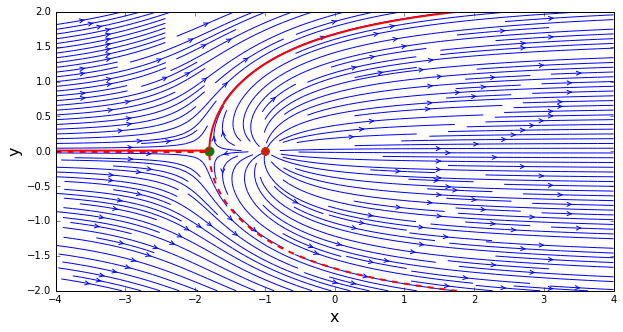

In [9]:
#source in free stream
U1 = u_free + usource
V1 = v_free + vsource
psi1 = psi_free + psi_source

#plot
size = 10
py.figure(figsize = (size, (yend-ystart)/(xend - xstart)*size))
py.xlabel('x',fontsize = 16)
py.ylabel('y',fontsize = 16)
py.xlim(xstart,xend)
py.ylim(ystart,yend)
py.streamplot(X,Y,U1,V1, density = 2, linewidth=1, arrowsize=1, arrowstyle='->')
py.scatter(xsource ,ysource, color = '#CD2305', s=60, marker = 'o')

#stagnation velocities
x_stag1 = xsource - strength_source/(2*np.pi*u_inf)
y_stag1 = ysource

py.scatter(x_stag1,y_stag1, color = 'g', s = 80, marker = 'o')

#dividing streamline
py.contour(X, Y ,psi1, levels = [-strength_source/2, strength_source/2], linewidths = 2, colors='red',linestyle = 'solid')


In [10]:
# Challenge Question
## Maximum Width of Rankine Half Body

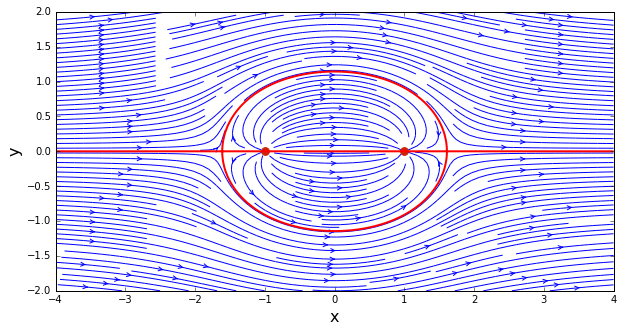

In [11]:
# Source and Sink in Free Stream

U2 = U1 + usink
V2 = V1 + vsink
psi2 = psi1 + psi_sink

#plot
size = 10
py.figure(figsize = (size, (yend-ystart)/(xend - xstart)*size))
py.xlabel('x',fontsize = 16)
py.ylabel('y',fontsize = 16)
py.xlim(xstart,xend)
py.ylim(ystart,yend)
py.streamplot(X,Y,U2,V2, density = 2, linewidth=1, arrowsize=1, arrowstyle='->')
py.scatter([xsource, xsink] ,[ysource,ysink] , color = '#CD2305', s=60, marker = 'o')

#dividing streamline
py.contour(X,Y,psi2, levels = [0.] ,linewidths = 2, colors='red',linestyle = 'solid')

In [12]:
# Challenge Question
## Length and width of Rankine Oval

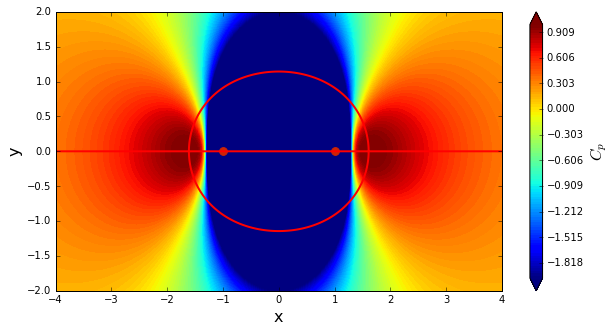

In [13]:
## Pressure Field
cp = 1.0 - ((U2**2+V2**2)/u_inf)**2

size = 10
py.figure(figsize = (size, (yend-ystart)/(xend - xstart)*size))
py.xlabel('x',fontsize = 16)
py.ylabel('y',fontsize = 16)
py.xlim(xstart,xend)
py.ylim(ystart,yend)
contf = py.contourf(X, Y, cp, levels = np.linspace(-2.0,1.0,100), extend = 'both')
cbar = py.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
py.scatter([xsource, xsink] ,[ysource,ysink] , color = '#CD2305', s=60, marker = 'o')
py.contour(X,Y,psi2, levels = [0.] ,linewidths = 2, colors='red',linestyle = 'solid')